In [1]:
import pandas as pd 
import numpy as np
#why did we use these libraries?
# pandas is used for data manipulation and analysis, while numpy is used for numerical operations.
# We will also use matplotlib and seaborn for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
#why did we use seaborn if we had matplotlib?
# Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.

In [2]:
import warnings
warnings.simplefilter("ignore")
# We use the warnings library to ignore any warnings that may arise during the execution of the code.

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns= ['Unnamed: 0', 'Booking_ID'], inplace=True)
# inplace=True means that the changes will be made to the original dataframe and not a copy of it.]


In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.isnull().sum() 


no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(7661)

In [9]:
df.drop_duplicates(inplace=True)


In [10]:
df.shape

(21359, 18)

In [11]:
df.columns  

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
df["booking_status"].value_counts()


booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64


#### OUR DATA IS IMBALANCED

In [13]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

#### DATA ANALYSIS

In [14]:
data = df.copy()

In [15]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


#### UNIVARIATE ANALYSIS

In [16]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()


#why does my some histogram are different than the ones in tuotorial?
#because of different versions of seaborn and matplotlib 
# how to fix that?
#update seaborn and matplotlib to the latest version
#pip install --upgrade seaborn matplotlib

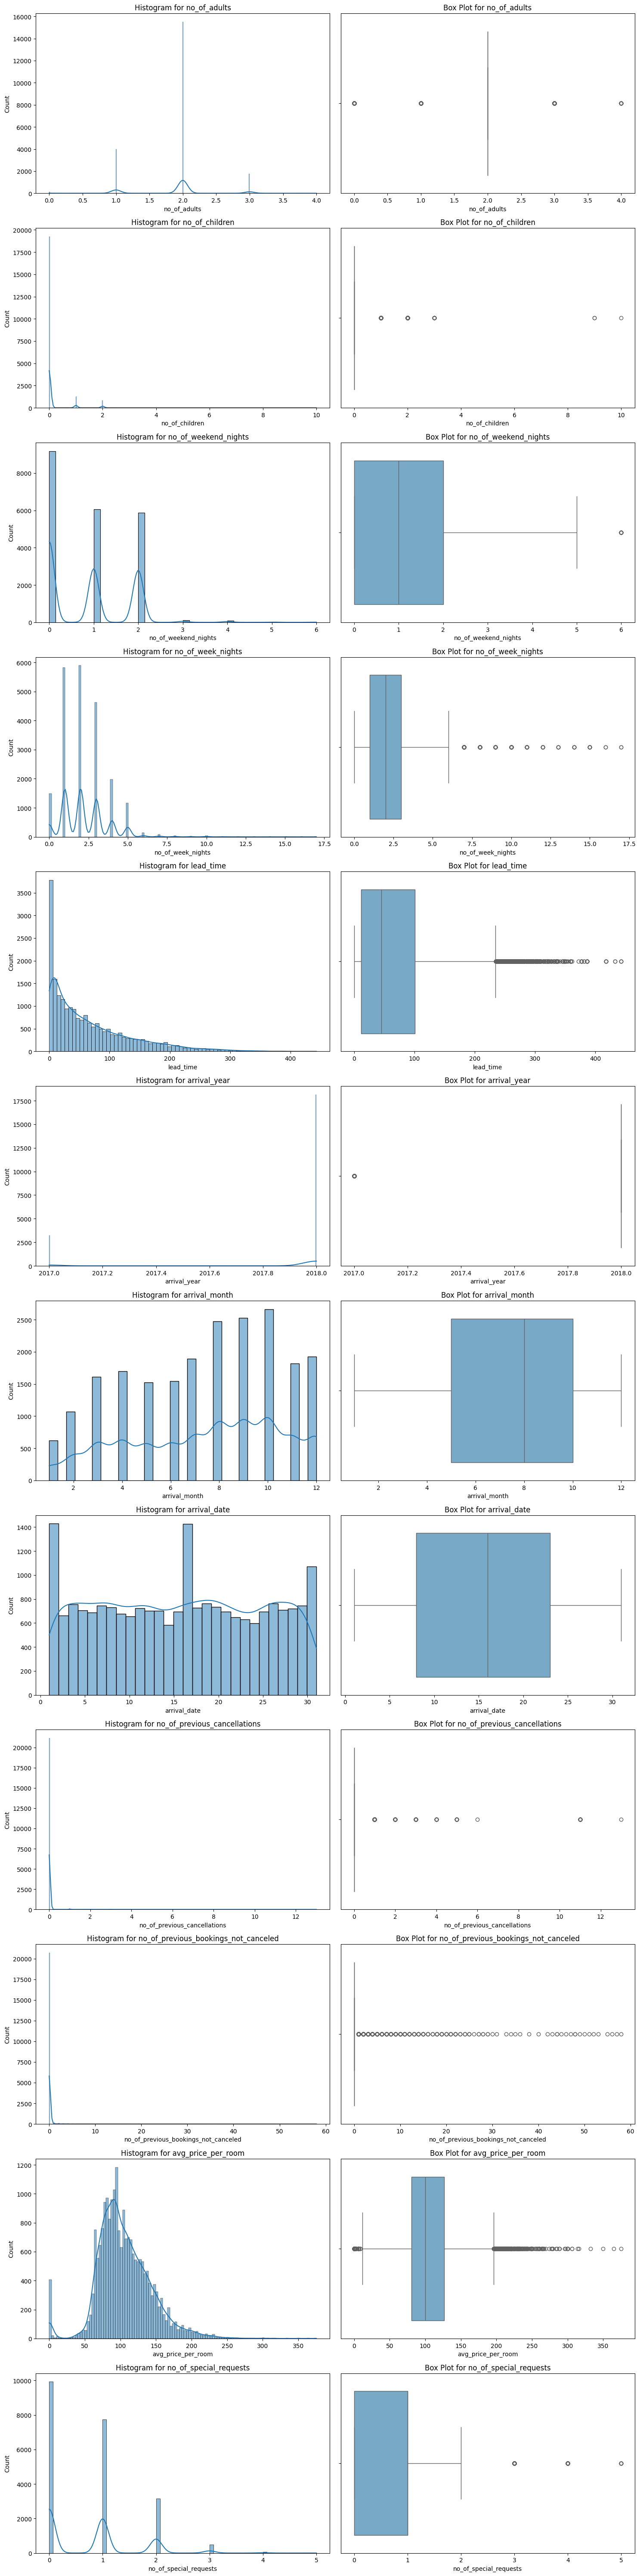

In [17]:
num_plot_dist(data, num_cols)


In [18]:
what did we learn from the histograms and box plots?
# Most numerical features are right-skewed, indicating that most values are concentrated on the lower end of the scale.
# There are some outliers in features like 'lead_time', 'avg_price_per_room', and 'no_of_special_requests'.
# The 'no_of_children' feature has a significant number of zeros, indicating that many bookings do not include children.
# The 'no_of_adults' feature shows that most bookings are for 2 adults, with fewer bookings for 1 or more than 2 adults.
# The 'no_of_weekend

Object `plots` not found.


###UNIVARIATE ANALYSIS


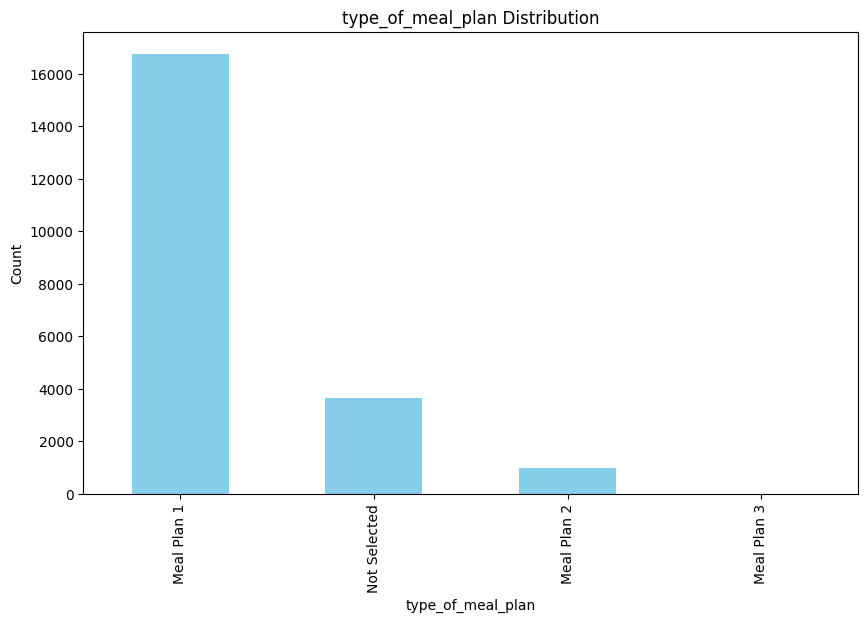

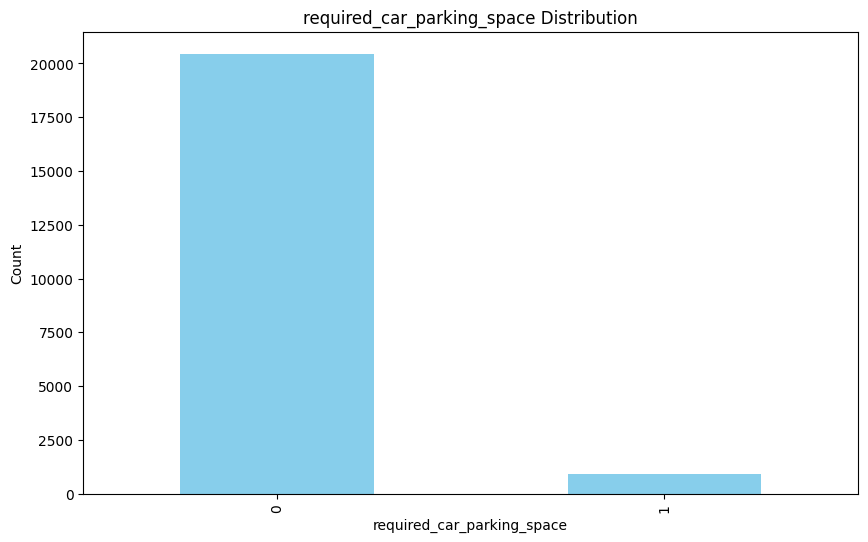

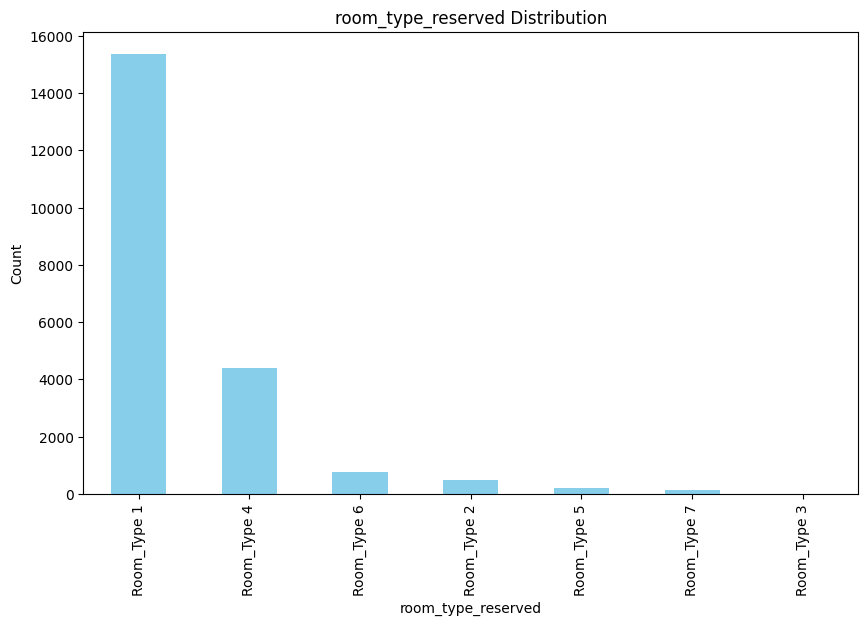

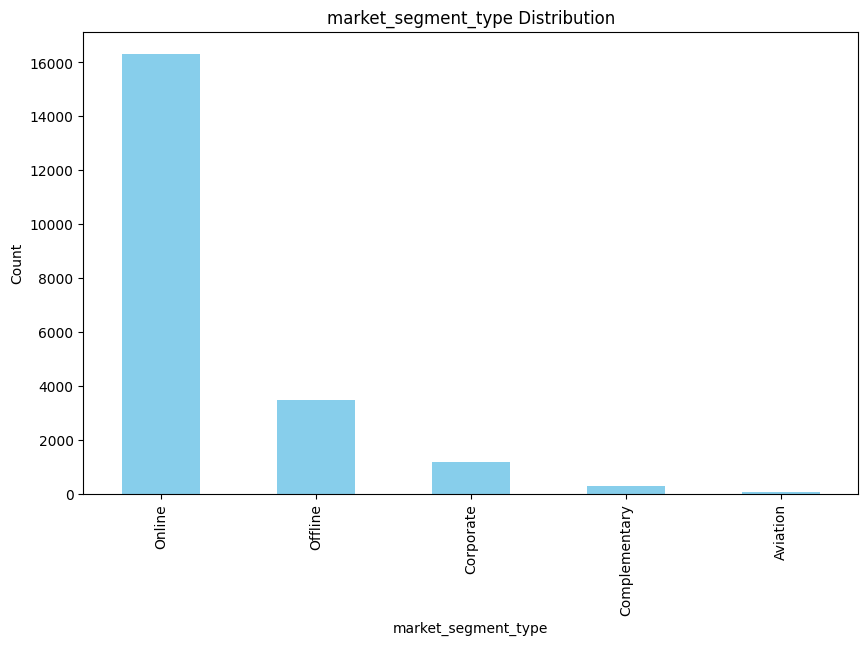

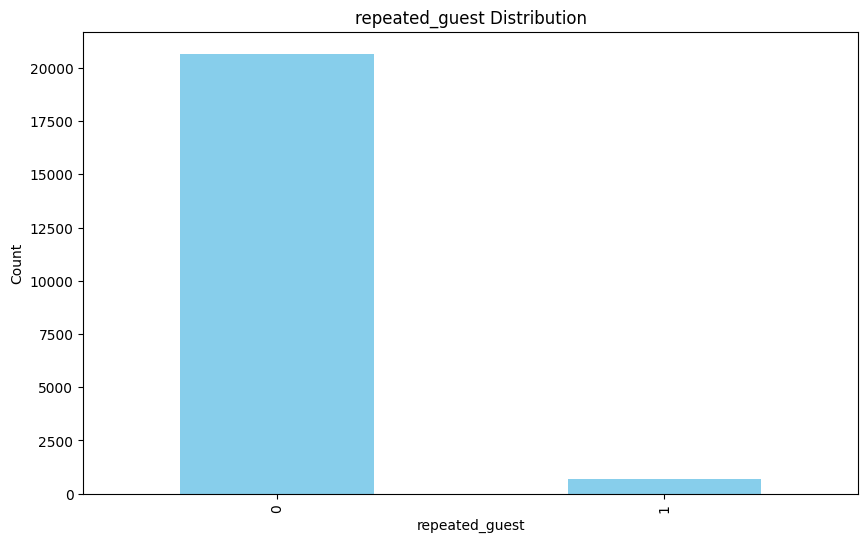

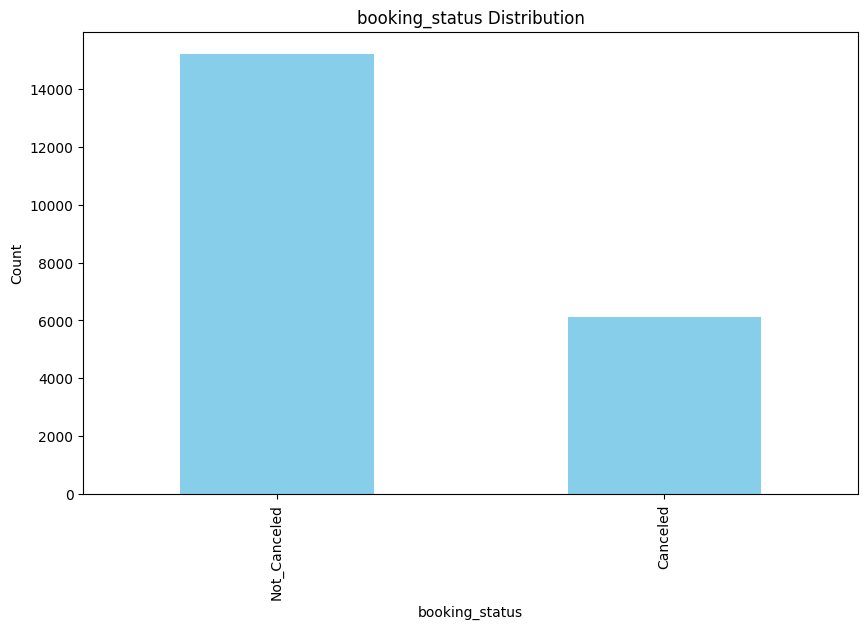

In [19]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#explain the and teach me what the above loop does?
# The loop iterates over each categorical feature in the cat_cols list.
# For each feature, it creates a bar plot showing the distribution of values in that feature.
# It sets the figure size, title, and axis labels for better visualization.
# Finally, it displays the plot using plt.show().
# This helps in understanding the frequency of each category in the categorical features.

### BIVARIATE ANALYSIS

In [20]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len (num_features)
    num_rows = (num_plots+1)//2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target,y=column, ax=axes[i] , data= df, palette="Blues")
        axes[i].set_title(f"{column} vs {target}")

    plt.tight_layout()
    plt.show()

#what does above code do I am new tell ?
# The function plot_bivariate_num creates box plots to visualize the relationship between numerical features and a target variable.
# It takes three arguments: df (the DataFrame), target (the target variable), and num_features (a list of numerical features).
# It calculates the number of rows needed for the subplots and creates a grid of subplots.
# For each numerical feature, it generates a box plot comparing the feature values across different categories of the target variable.
# The plots are displayed in a grid layout for easy comparison.
# explain each line of code in the function?
# 1. num_plots = len(num_features): This line calculates the number of numerical features to be plotted.
# 2. num_rows = (num_plots + 1) // 2: This line calculates the number of rows needed for the subplots, ensuring that there are two plots per row.
# 3. fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5)): This line creates a figure and a grid of subplots with the specified number of rows and 2 columns, setting the figure size.         
# 4. axes = axes.flatten(): This line flattens the 2D array of axes into a 1D array for easier indexing.
# 5. for i, column in enumerate(num_features): This line starts a loop that iterates over each numerical feature, with i as the index and column as the feature name.
# 6. sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues"): This line creates a box plot for the current numerical feature against the target variable, using the specified axis and color palette.
# 7. axes[i].set_title(f"{column} vs {target}"): This line sets the title for the current subplot, indicating which feature is being compared to the target variable.
# 8. plt.tight_layout(): This line adjusts the layout of the subplots to prevent overlap and ensure proper spacing.
# 9. plt.show(): This line displays the figure with all the subplots.   



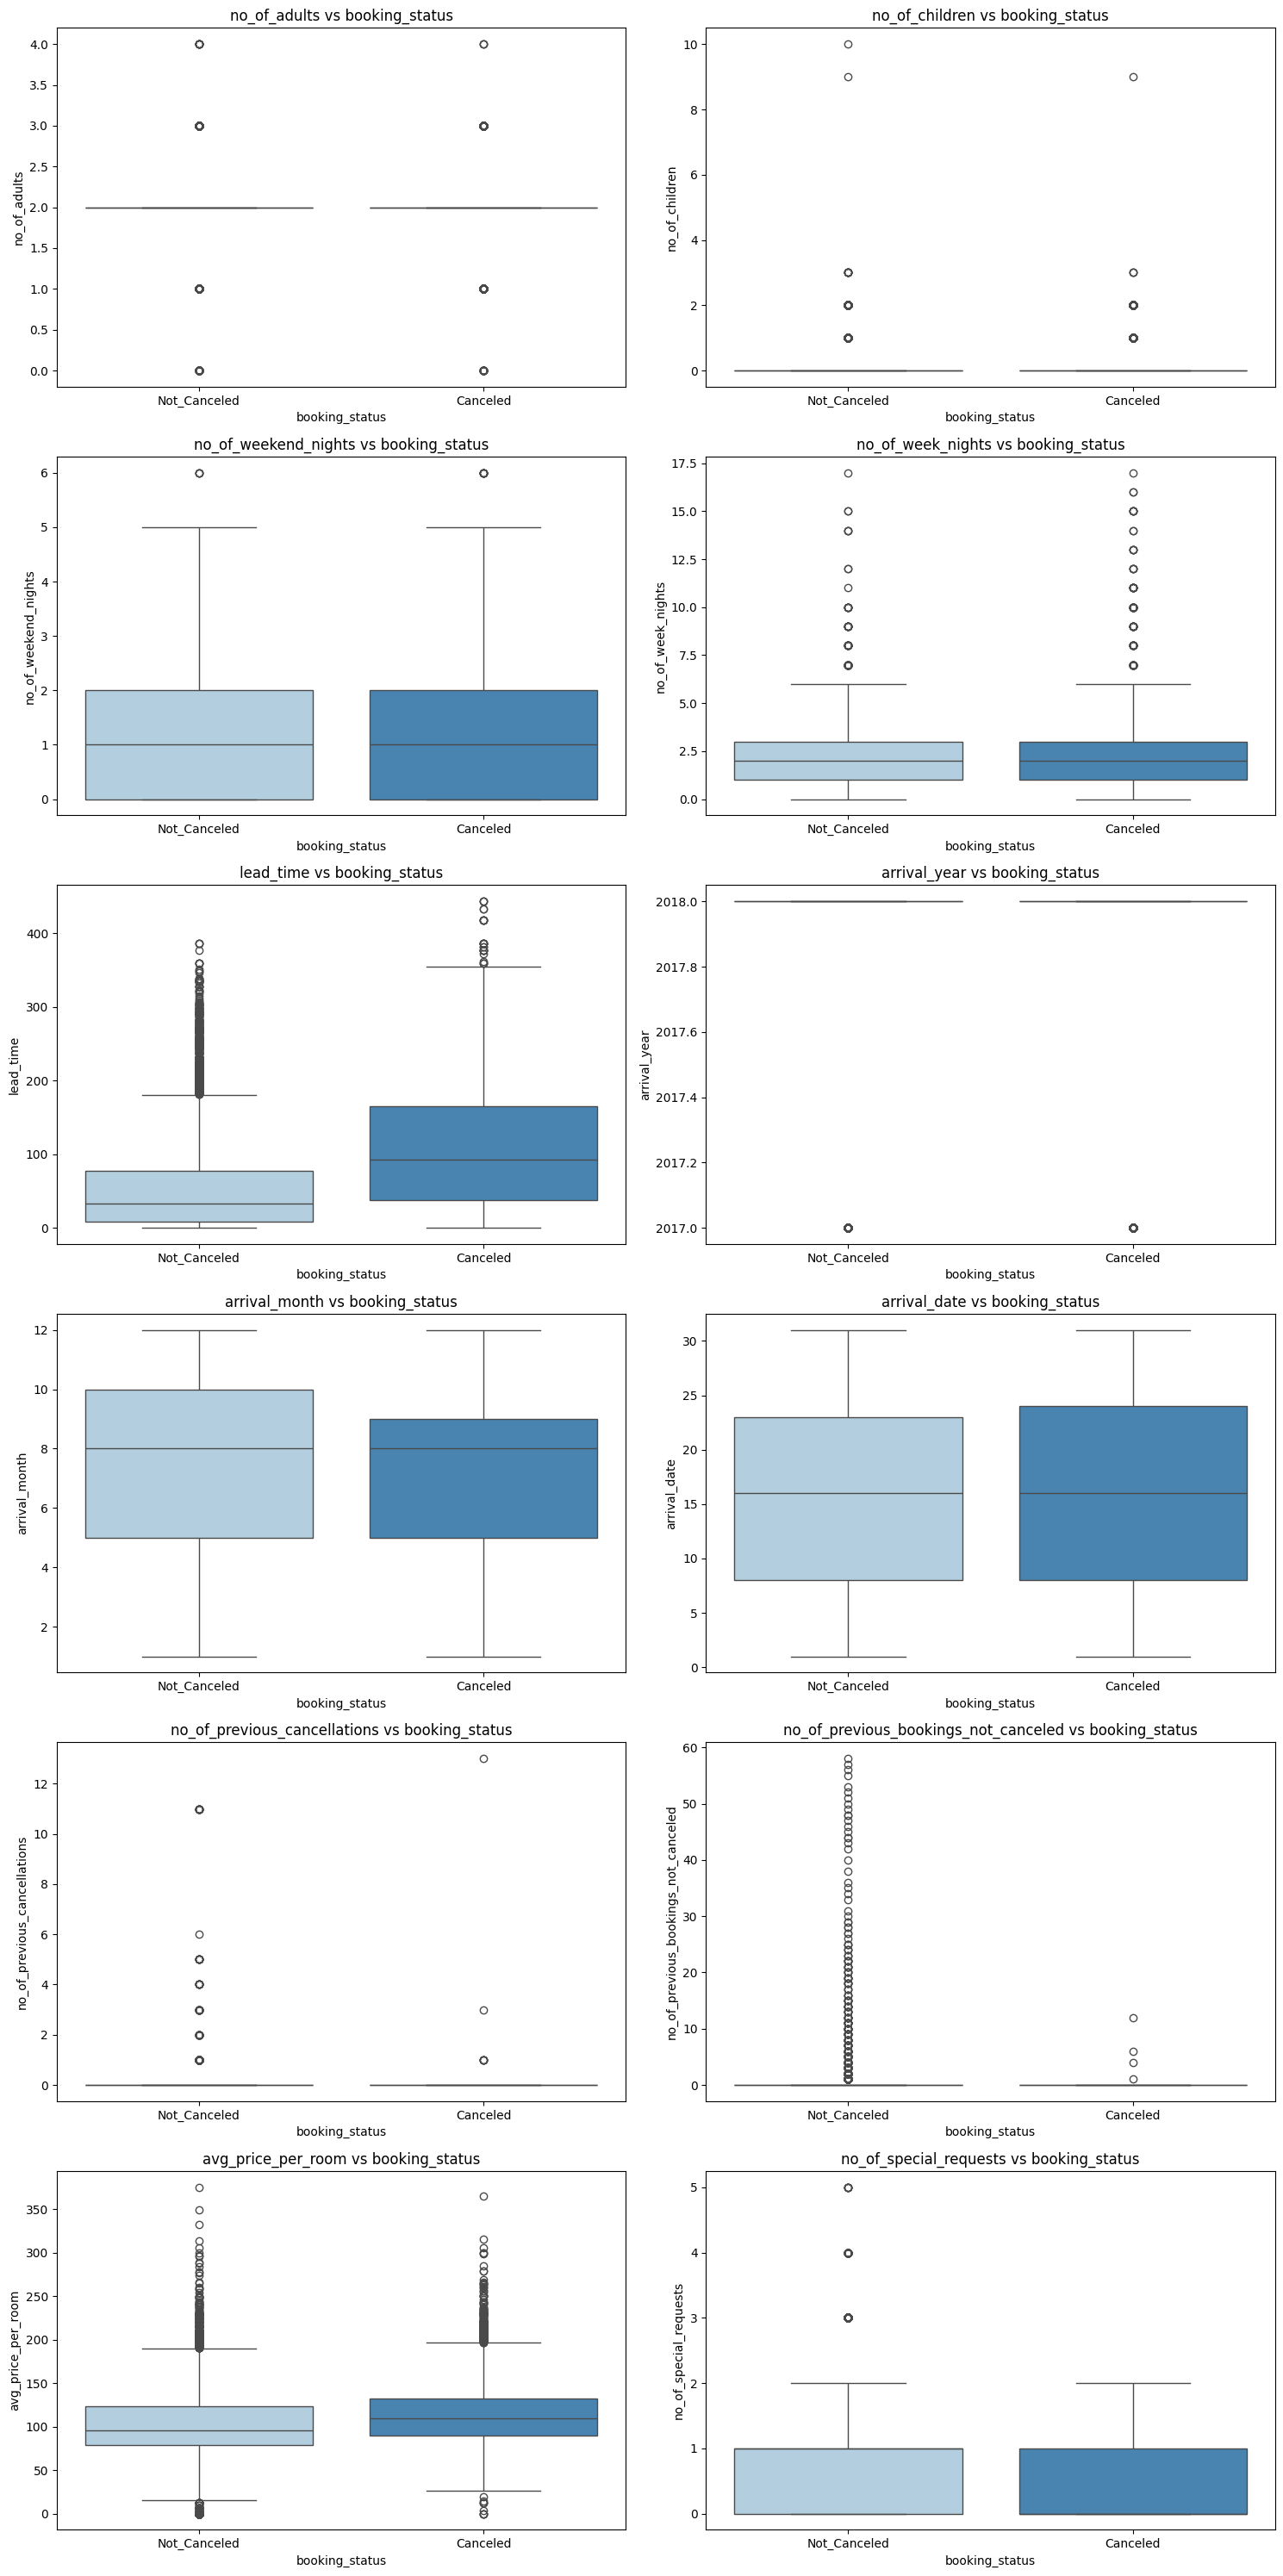

In [21]:
plot_bivariate_num(data, 'booking_status', num_cols)

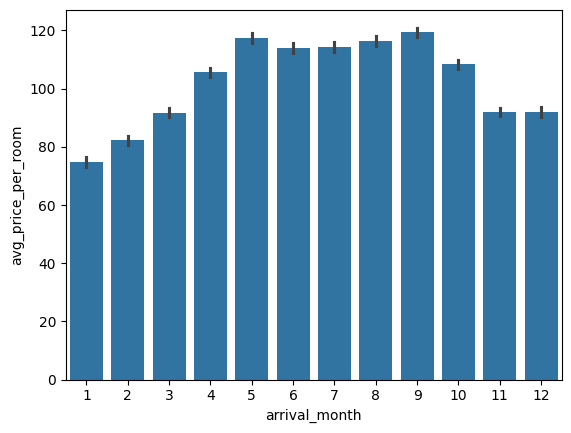

In [22]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data, )
plt.show()

In [23]:
def plot_bivariate_cat(df, target, cat_features):

    num_features = len(cat_features) 

    num_rows = (num_features+1)//2 # 
    
    fig,axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature,hue=target, data= df, palette="Set2", ax=axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

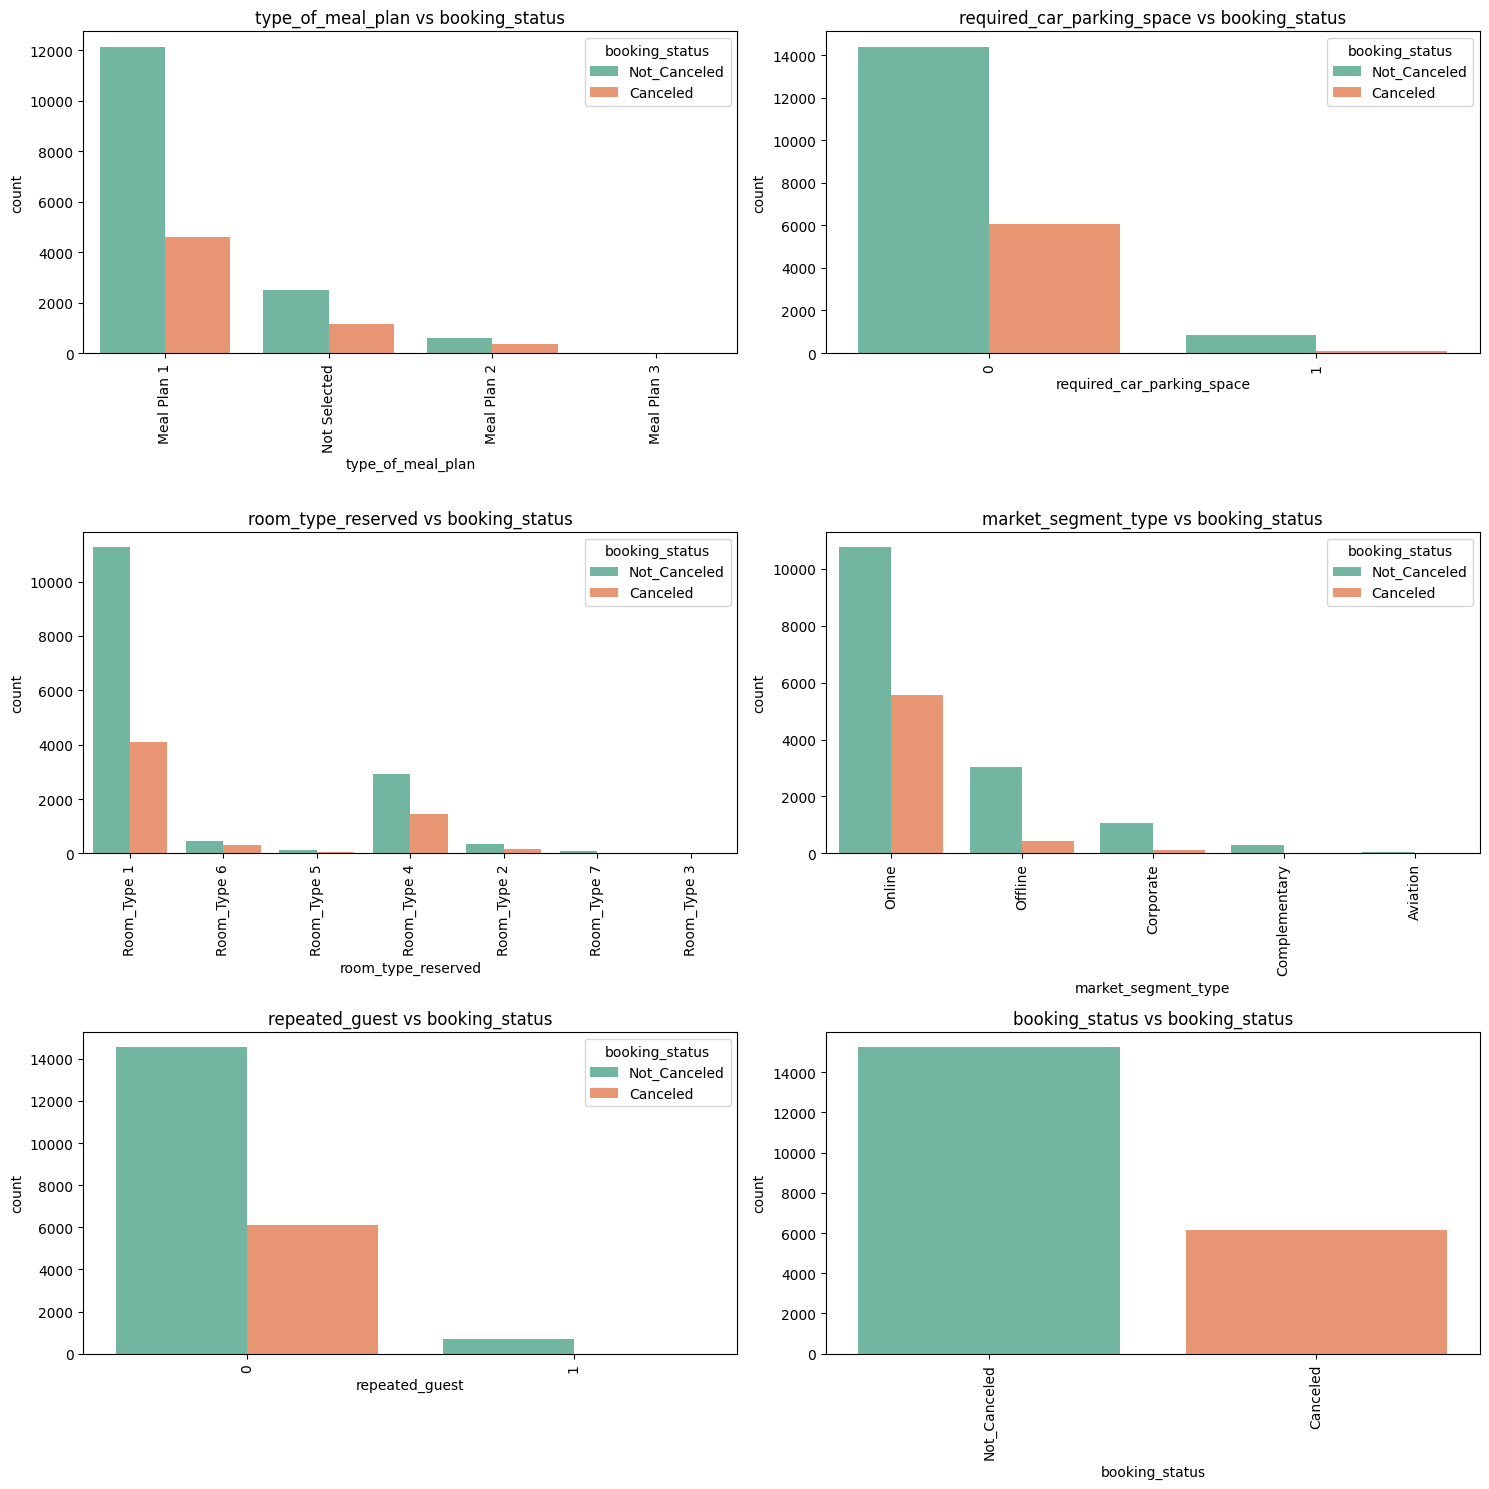

In [24]:
plot_bivariate_cat(data, 'booking_status', cat_cols)


### DATA PROCESSING


In [25]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [26]:
df.info()

# why cannot we input objects to a machine learning model why? 

# difference between ordianal and nominal categorical variables?
# Ordinal categorical variables have a meaningful order or ranking among their categories (e.g., 'low', 'medium', 'high'), while nominal categorical variables do not have any inherent order (e.g., 'red', 'blue', 'green').           

# difference between label encoding and one hot encoding and ordinal encoding?
# Label encoding assigns a unique integer to each category, which can imply an ordinal relationship even when
# none exists. One-hot encoding creates binary columns for each category, avoiding any ordinal implications. Ordinal encoding assigns integers based on the order of categories, preserving their ranking.
# when to use label encoding and when to use one hot encoding?
# Use label encoding for ordinal categorical variables where the order matters. Use one-hot encoding for nominal categorical variables where there is no inherent order among categories.




<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [27]:

##### LABEL ENCODING #####

from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoders = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoders.fit_transform(df[col])
    #what happened above?
    #   The above code applies label encoding to each categorical column in the cat_cols list.
    #   It transforms the categorical values into numerical labels, which can be used in machine learning

    mappings[col] = {label:code for label, code in zip(label_encoders.classes_, label_encoders.transform(label_encoders.classes_))}
    # explain the above line of code? with its syntax too? 
    # The above line creates a dictionary mapping each original categorical label to its corresponding numerical code.
    # It uses a dictionary comprehension to iterate over the unique classes and their transformed codes,
    # zipping them together to form key-value pairs for easy reference later.

    


In [29]:
for label, code in mappings.items():
    print(f"Mapping for {label}: {code}")
    

Mapping for type_of_meal_plan: {'Meal Plan 1': np.int64(0), 'Meal Plan 2': np.int64(1), 'Meal Plan 3': np.int64(2), 'Not Selected': np.int64(3)}
Mapping for required_car_parking_space: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
Mapping for room_type_reserved: {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}
Mapping for market_segment_type: {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}
Mapping for repeated_guest: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
Mapping for booking_status: {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}


In [30]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [31]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [33]:
### MULTICOLLINEARITY CHECK ###

!pip install statsmodels
# why did we need this library?
# The statsmodels library is used for statistical modeling and hypothesis testing. It provides tools for estimating and interpreting various statistical models, including regression analysis, which is essential for checking multicollinearity among features in a dataset


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
#what is above line of code used for?
# The above line imports the variance_inflation_factor function from the statsmodels library.
# This function is used to calculate the Variance Inflation Factor (VIF) for each feature in a dataset,
# which helps to identify multicollinearity among the features.
# what is multicollinearity simply?
# 

from statsmodels.tools.tools import add_constant

#what is above line of code used for?
# The above line imports the add_constant function from the statsmodels library.
# This function is used to add a constant (intercept) term to a dataset, which is often required for regression analysis.
# It ensures that the model includes an intercept, allowing for a more accurate representation of the relationship between the independent and dependent variables.



In [35]:
X = add_constant(df)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# what does above line of code do?
# The above line calculates the Variance Inflation Factor (VIF) for each feature in the dataset X.
# It creates a new DataFrame vif_data with two columns: "feature" containing the feature names and "VIF" containing the corresponding VIF values.
# The VIF values are computed using a list comprehension that iterates over the range of the number of features in X.




In [36]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


### our data doent have multicollinearity

In [37]:
corr = df.corr()


In [38]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

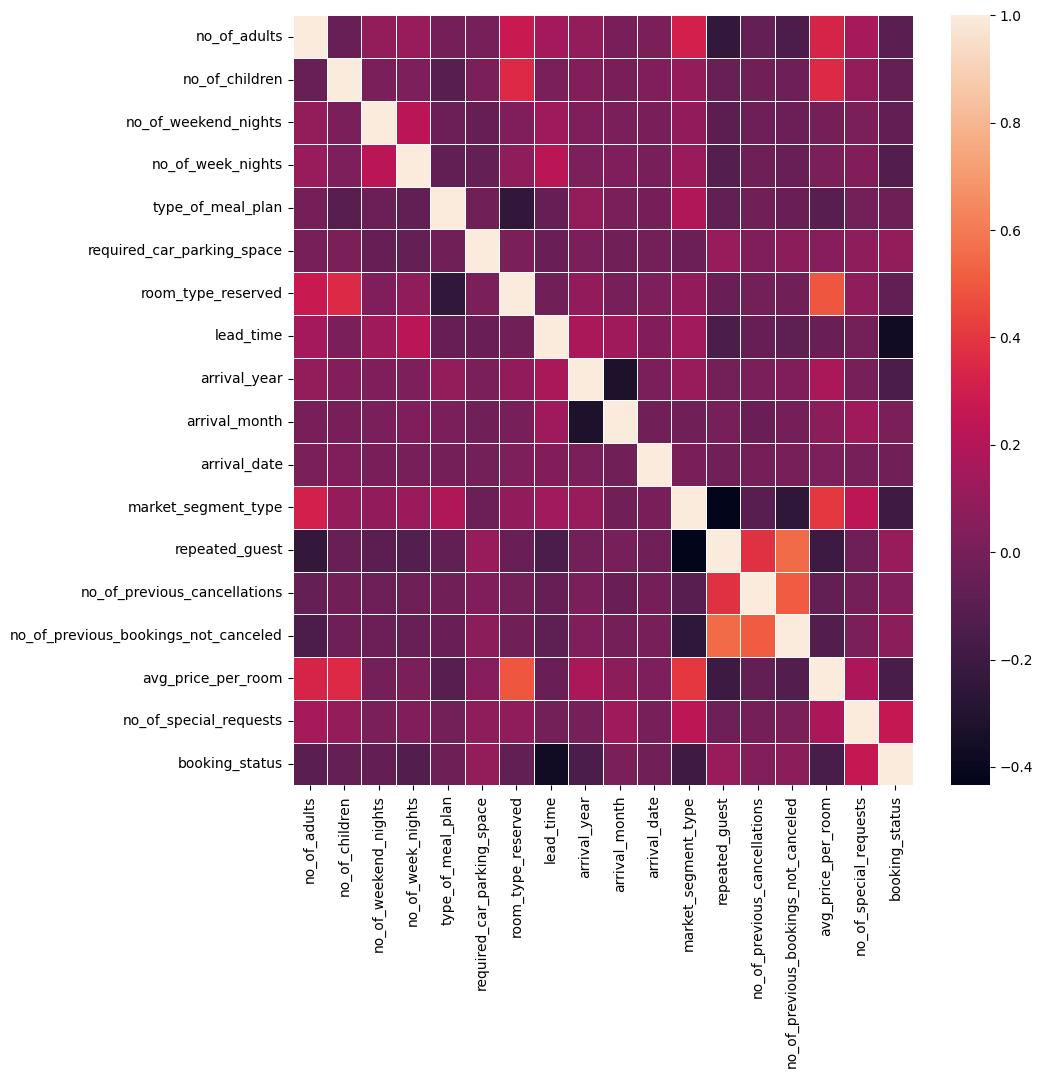

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,linewidths=0.5)

In [40]:
##### SKEWNESS #####

skewness = df.skew()

#what is skewness? in simple terms?
# Skewness is a measure of the asymmetry of a distribution. It indicates whether the data is skewed to the left (negative skew) or to the right (positive skew).
# A skewness value of zero indicates a perfectly symmetrical distribution.

 #what happenes simply tell if you do not fix skewness?
# If skewness is not addressed, it can lead to biased estimates and reduced model performance.


In [41]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [42]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])
        #explain the above line of code?
        # The above line applies a logarithmic transformation to the specified column in the DataFrame df.
        # It uses the np.log1p function, which computes the natural logarithm of one plus the input value.
        # This transformation is often used to reduce skewness in data, making it more normally distributed and suitable for analysis.
        #why do we use log1p instead of log?
        # We use log1p instead of log to handle cases where the input value is zero or negative.
        # The log1p function computes log(1 + x), which is defined for all x >= -1, thus avoiding issues with taking the logarithm of zero or negative numbers.
        # In contrast, the log function is only defined for positive values, which can lead to errors or undefined results when applied to zero or negative values.
        # This makes log1p particularly useful for datasets that may contain zero or negative values, such as count data or certain financial data.
        #log1p is more stable for small values close to zero.

    

In [43]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [44]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [45]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']



In [46]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [47]:
!pip install imbalanced-learn

In [48]:
Y.value_counts()


NameError: name 'Y' is not defined

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [51]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [52]:
df.shape

(21359, 18)

In [53]:
#### NOW FOR X RES ####

balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res

In [54]:
balanced_df.shape

(30462, 18)

In [55]:
df = balanced_df.copy()

In [56]:
df.shape

(30462, 18)

In [57]:
#### FEATURE SELECTION ####

In [58]:
len(df.columns)

18

In [59]:
from sklearn.ensemble import RandomForestClassifier
# is there more recommeded feature selection techniques?
# Yes, there are several other recommended feature selection techniques, including:
# 1. Recursive Feature Elimination (RFE)
# 2. Principal Component Analysis (PCA)
# 3. Lasso Regression
# 4. Mutual Information
# 5. Chi-Squared Test
# 6. Tree-based feature selection (e.g., using decision trees or gradient boosting)

# why did the tutorial use random forest classifier for feature selection?
# The tutorial likely used Random Forest Classifier for feature selection because it is a powerful ensemble learning method that can effectively handle high-dimensional data and capture complex interactions between features.
# Random Forests provide feature importance scores, which help identify the most relevant features for predicting the target variable.
# Additionally, Random Forests are robust to overfitting and can handle both numerical and categorical data, making them a versatile choice for feature selection tasks.



In [60]:

X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [61]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# what does above code do?
# The above code initializes a RandomForestClassifier model with a specified random state for reproducibility.
# It then fits the model to the feature set X and target variable y, training the model to learn the relationship between the features and the target.
# This trained model can then be used for making predictions or evaluating feature importance.  



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
feature_importance = model.feature_importances_

In [63]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})



In [64]:
top_features_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [65]:
len(df.columns)

18

In [66]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ['booking_status']]

#what does above code do?
# The above code selects the top 10 most important features based on their importance scores from the feature_importance_df DataFrame.
# It then creates a new DataFrame top_10_df that includes only these top 10 features along with the target variable 'booking_status'.
# This new DataFrame can be used for further analysis or modeling, focusing on the most relevant features.


In [67]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [68]:
len(top_10_df.columns)

11

In [69]:
df = top_10_df.copy()

### MODEL SELECTION ###

In [70]:
!pip install xgboost lightgbm 

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# i am new to this what does above code do?
# The above code imports various machine learning models and evaluation metrics from popular libraries such as scikit-learn, XGBoost, and LightGBM.
# It includes classifiers like RandomForestClassifier, GradientBoostingClassifier, LogisticRegression, SVC, DecisionTreeClassifier, GaussianNB, KNeighborsClassifier, XGBClassifier, and LGBMClassifier.
# Additionally, it imports metrics such as accuracy_score, precision_score, recall_score, and f1_score to evaluate the performance of the models.
# These imports are essential for building, training, and evaluating machine learning models on the dataset
X = df.drop(columns=['booking_status'])

In [72]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=42),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}


In [75]:
metrics = {
    "Model" : [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [76]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred)

    recall = recall_score(y_test, y_pred)

    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)

# how does above code work explain each line?
# The above code evaluates multiple classifiers on the training and testing datasets.
# It iterates through a dictionary of classifiers, fits each classifier to the training data, and
# makes predictions on the test data.
# It then calculates evaluation metrics (accuracy, precision, recall, F1-score) for each model and stores the results in a metrics dictionary for later analysis.                      
# explain each line of code in the for loop?
# 1. for model_name, classifier in classifiers.items(): This line starts a loop that iterates over each classifier in the classifiers dictionary, unpacking the model name and the classifier object.
# 2. classifier.fit(X_train, y_train): This line fits the current classifier to the training data (X_train and y_train), training the model to learn the relationship between features and the target variable.
# 3. y_pred = classifier.predict(X_test): This line uses the trained classifier to make predictions on the test data (X_test), storing the predicted values in y_pred.
# 4. accuracy = accuracy_score(y_test, y_pred): This line calculates the accuracy of the predictions by comparing the true labels (y_test) with the predicted labels (y_pred).
# 5. precision = precision_score(y_test, y_pred): This line calculates the precision of the predictions, which measures the proportion of true positive predictions among all positive predictions.
# 6. recall = recall_score(y_test, y_pred): This line calculates the recall of the predictions, which measures the proportion of true positive predictions among all actual positive instances.
# 7. f1 = f1_score(y_test, y_pred): This line calculates the F1-score, which is the harmonic mean of precision and recall, providing a single metric that balances both.
# 8. metrics["Model"].append(model_name): This line appends the current model name to the "Model" list in the metrics dictionary.
# 9. metrics["Accuracy"].append(accuracy): This line appends the calculated accuracy to the "Accuracy" list in the metrics dictionary.
# 10. metrics["Precision"].append(precision): This line appends the calculated precision to the "Precision" list in the metrics dictionary.
# 11. metrics["Recall"].append(recall): This line apppends the calculated recall to the "Recall" list in the metrics dictionary.
# 12. metrics["F1-Score"].append(f1): This line appends the calculated F1-score to the "F1-Score" list in the metrics dictionary.



[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [77]:
metrics_df = pd.DataFrame(metrics)

In [78]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.891679,0.892508,0.892508,0.892508
1,LogisticRegression,0.774331,0.802787,0.731922,0.765718
2,Gradient Boosting,0.837190,0.821473,0.864821,0.842590
3,Support Vector Classifier,0.720335,0.729657,0.706840,0.718068
4,Decision Tree,0.840801,0.850000,0.830619,0.840198
5,KNN,0.779583,0.856376,0.675896,0.755507
6,Naive Bayes,0.773346,0.803232,0.728664,0.764133
7,XGBoost,0.870343,0.866324,0.878176,0.872210
8,AdaBoostClassifier,0.804202,0.821294,0.781433,0.800868
9,LightGBM,0.866732,0.851494,0.890879,0.870742


#### MODEL TRAINING


In [79]:
#### TRAIN RANDOM FOREST MODEL
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [80]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
rf = RandomForestClassifier(random_state=42)

In [83]:
params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

#what does above code do?

#why are we training it again didnt we do it previously?
# We are training it again to perform hyperparameter tuning using RandomizedSearchCV.
# This allows us to find the best combination of hyperparameters for the Random Forest model,
# which can improve its performance compared to the default settings used in the previous training.     

In [84]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring = 'accuracy'
)

In [85]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   6.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.4s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....x7fb132fd8b90>, 'min_samples_leaf': <scipy.stats....x7fb132fc1810>, 'min_samples_split': <scipy.stats....x7fb132fd8cd0>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [86]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [87]:
best_rf_model = random_search.best_estimator_

In [88]:
y_pred = best_rf_model.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)



In [90]:
accuracy

0.8921713441654358

In [91]:
precision

0.8898222940226171

In [92]:
recall

0.8970684039087948

In [93]:
#### SAVE THE MODEL ####

In [94]:
import joblib


In [95]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [96]:
loaded_model = joblib.load("random_forest.pkl")

In [97]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [98]:
new_data = np.array([	190,	1	,93.5,	9,	8,	4,	5,	2,	0,	0]).reshape(1,-1)

In [99]:
predictions = loaded_model.predict(new_data)

In [102]:
predictions

array([1])

In [101]:
# RANDOM forest is very large model size outputs??
# Yes, Random Forest models can be quite large in size due to the ensemble of multiple decision trees they contain.
# so we will not be using random forest instead we will use light gbm
